# 1. Phase de prétraitement :

# Import et affichage du jeu de données


In [2]:
import pandas as pd
df = pd.read_csv('titanic-passengers.csv',sep = ";")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# Les informations générales sur les colonnes et les valeurs de données.

In [3]:
df.info(show_counts = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   PassengerId  int64  
 1   Survived     object 
 2   Pclass       int64  
 3   Name         object 
 4   Sex          object 
 5   Age          float64
 6   SibSp        int64  
 7   Parch        int64  
 8   Ticket       object 
 9   Fare         float64
 10  Cabin        object 
 11  Embarked     object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Les valeurs manquantes

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Remplacer les valeurs maquantes 
## données numeriques par la moyenne
## données categorielles par la valeur la plus frequente

In [6]:
df["Age"].fillna(df["Age"].mean(),inplace =True)
df["Cabin"].fillna("G6",inplace = True)
df["Embarked"].fillna("S",inplace = True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [7]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Transformation des données categorielles en données numeriques
## A chaud 1: Mr, 0:Mrs
## survived 0: non, 1:oui

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["Sex"]=encoder.fit_transform(df["Sex"])
df["Cabin"]=encoder.fit_transform(df["Cabin"])
df["Ticket"]=encoder.fit_transform(df["Ticket"])
df["Survived"]=encoder.fit_transform(df["Survived"])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,159,13.0000,145,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,347,7.6500,140,S
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,409,7.8542,145,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,395,21.0750,145,S
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,569,52.0000,38,S


# 2. Phase de Visualisation


# la distrubition de l'age, des classes, des tickets et sex


<AxesSubplot:title={'center':'histogramme des ages'}, xlabel='Age', ylabel='Frequency'>

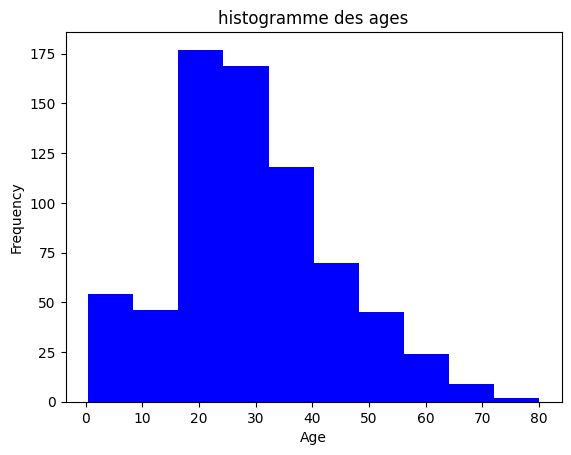

In [62]:
import matplotlib.pyplot as plt
plt.title("histogramme des ages")
plt.xlabel("Age")
df["Age"].plot.hist(color = "blue")

<AxesSubplot:title={'center':'histogramme des classes'}, xlabel='Pclass', ylabel='Frequency'>

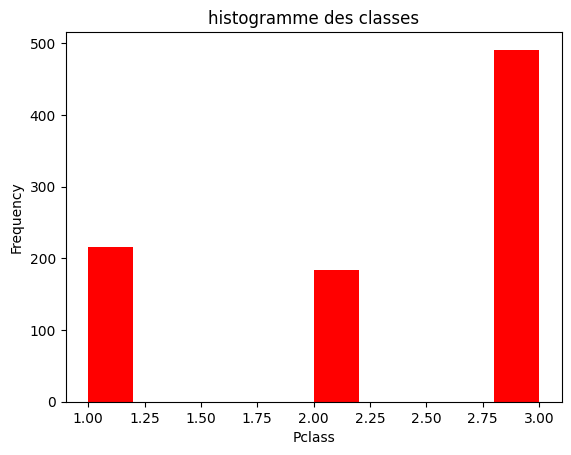

In [63]:
plt.title("histogramme des classes")
plt.xlabel("Pclass")
df["Pclass"].plot.hist(color = "red")



<AxesSubplot:title={'center':'histogramme des prix de tickets'}, xlabel='Fare', ylabel='Frequency'>

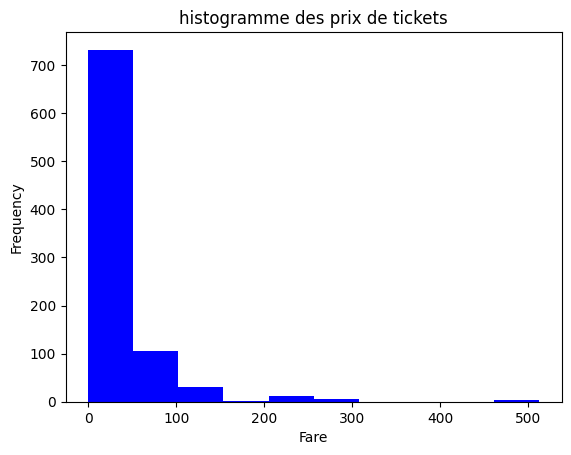

In [6]:
plt.title("histogramme des prix de tickets")
plt.xlabel("Fare")
df["Fare"].plot.hist(color = "blue")

<AxesSubplot:ylabel='Sex'>

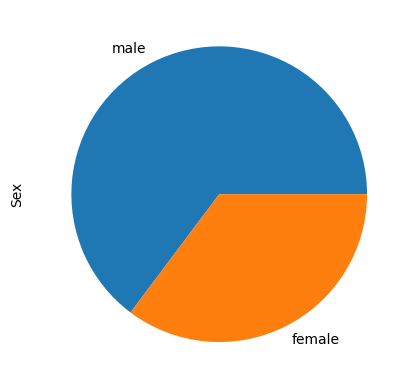

In [12]:
df.Sex.value_counts().plot(kind="pie")

<AxesSubplot:ylabel='Survived'>

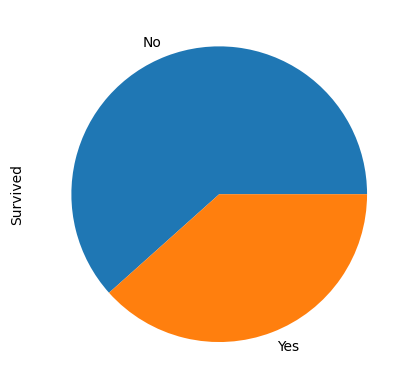

In [13]:
df.Survived.value_counts().plot(kind="pie")

# La corrélation entre le sexe et l’âge

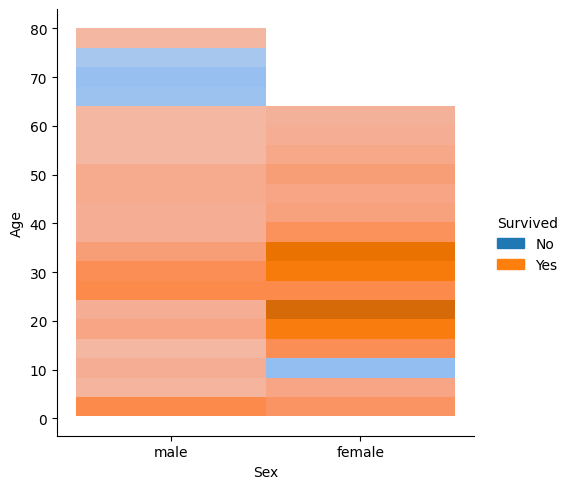

In [66]:
import seaborn as sns
sns.displot(data = df, x="Sex", y="Age",hue = "Survived")

## L'impact de la classe et l'embarquement sur la survie 

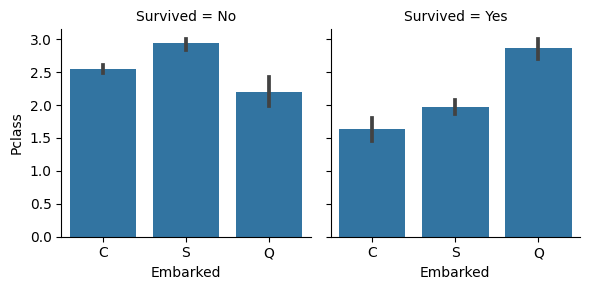

In [68]:
import seaborn as sns
grid = sns.FacetGrid(df,col ="Survived")
grid.map(sns.barplot,"Embarked","Pclass",order = None)


In [69]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

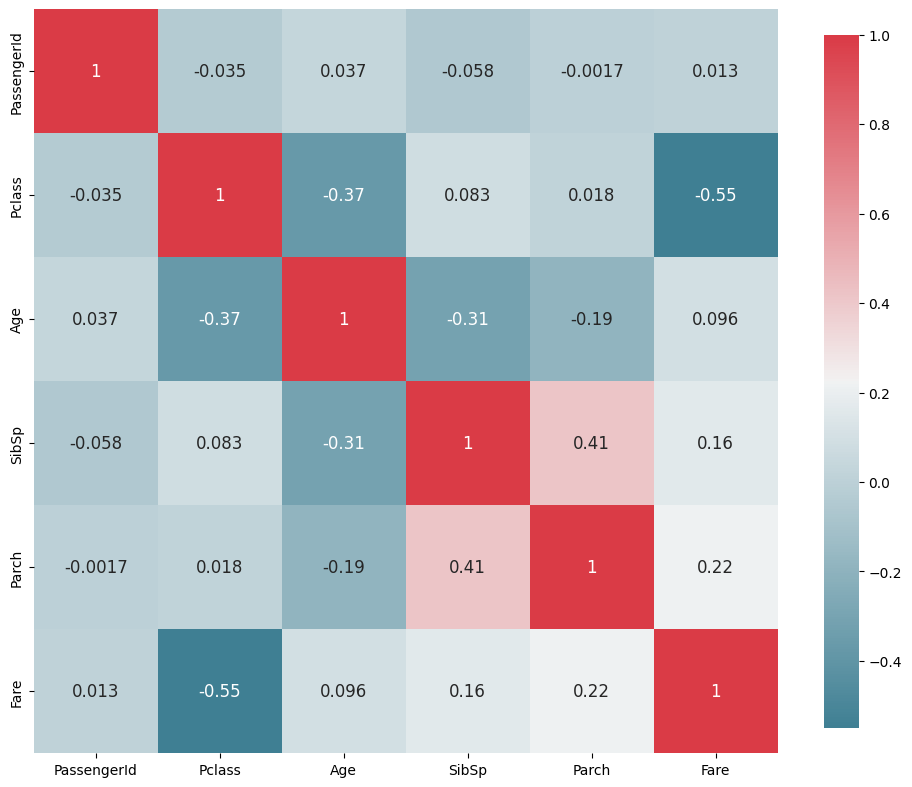

In [72]:
plot_correlation_map(df)

## Positive correlations are displayed in red and negative correlations in blue. The intensity of the color is proportional to the correlation coefficients. To the right of the correlogram, the color legend shows the correlation coefficients and the corresponding colors.

##  afficher la relation entre Pclass et survived par groupby

In [15]:
cleanup={"Survived":{"Yes":1,"No":0}}
df.replace(cleanup,inplace=True)
df[["Pclass","Survived"]].groupby(["Pclass"],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


## Supprimer les colonnes inutiles

In [24]:
df =df.drop(columns =["Name","Parch","SibSp"],axis=1)

In [25]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
0,343,No,2,male,28.0,248740,13.0000,G6,S
1,76,No,3,male,25.0,348123,7.6500,F G73,S
2,641,No,3,male,20.0,350050,7.8542,G6,S
3,568,No,3,female,29.0,349909,21.0750,G6,S
4,672,No,1,male,31.0,F.C. 12750,52.0000,B71,S


## créer une nouvelle colonne appelée Title qui contient le titre approprié pour chaque individu

In [143]:
data = [df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # remplacer les titres par un titre plus courant ou comme Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    df =df.drop(columns =["Name","Parch","SibSp"],axis=1)

In [144]:
df.head(8)

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title
0,343,0,2,1,28.0,159,13.0000,145,S,Mr
1,76,0,3,1,25.0,347,7.6500,140,S,Mr
2,641,0,3,1,20.0,409,7.8542,145,S,Mr
3,568,0,3,0,29.0,395,21.0750,145,S,Mrs
4,672,0,1,1,31.0,569,52.0000,38,S,Mr
5,105,0,3,1,37.0,245,7.9250,145,S,Mr
6,576,0,3,1,19.0,420,14.5000,145,S,Mr
7,382,1,3,0,1.0,187,15.7417,145,C,Miss


## La correlation entre les titres et les ages

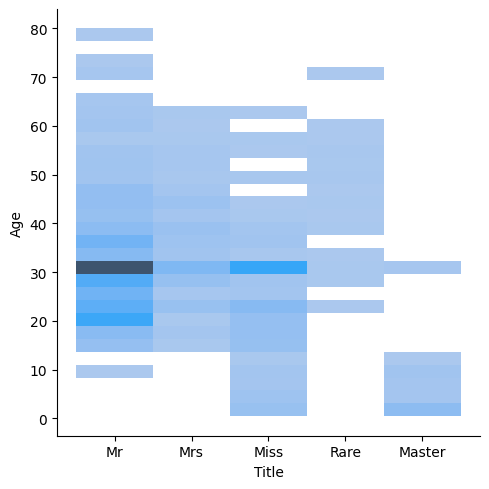

In [112]:
import seaborn as sns
sns.displot(data = df, x="Title", y="Age")

In [113]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

}

## les mêmes corrélations en utilisant ces nouveaux titres

In [118]:
#import seaborn as sns
#sns.displot(data = df, x="Title_Dictionary", y="Age")
#Erreur : Could not interpret value `Title_Dictionary` for parameter `x`

## use the Parch and the SibSp columns to create a more useful feature
## Pour chaque rangée/passager, nous déterminerons la taille de sa famille en ajoutant SibSp + Parch + 1 (lui-même)

In [9]:
df['family_size'] = df["SibSp"] + df["Parch"] + 1


In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,159,13.0000,145,S,1
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,347,7.6500,140,S,1
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,409,7.8542,145,S,1
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,395,21.0750,145,S,5
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,569,52.0000,38,S,2


## Les deux colonnes sont SibSp et Parch, qui ne sont pas directement liées au fait qu'une personne ait survécu ou non mais oui cette fonctionalité est utile car cela semble avoir un bon effet sur notre prédiction.


In [158]:
print( df[["family_size","Survived"]].groupby(["family_size"], as_index = False).mean() )

   family_size  Survived
0            1  0.303538
1            2  0.552795
2            3  0.578431
3            4  0.724138
4            5  0.200000
5            6  0.136364
6            7  0.333333
7            8  0.000000
8           11  0.000000


## La taille de la famille varie d'un minimum de 1 à un maximum de 11, la taille de la famille de 4 ayant le taux de survie le plus élevé de 72 %.